** Arboles de Desicion**

In [321]:
import pandas as pd # sirve para el manejo y analisis de datos y estructuras 

In [322]:
import numpy as np # sirve para el calculo numerico y analisis de datos 

In [323]:
import matplotlib.pyplot as plt # sirve para crear graficos en dos dimensiones

In [324]:
import seaborn as sns # sirve para crear graficos estadisticos 

In [325]:
import matplotlib.pyplot as plt # sirve para crear graficos en dos dimensiones

In [326]:
from sklearn import metrics # libreria para modelos de ciencias de datos

In [327]:
from sklearn.model_selection import train_test_split # libreria para modelos de ciencias de datos

In [328]:
from sklearn.linear_model import LogisticRegression # libreria para modelos de ciencias de datos

In [329]:
from sklearn.linear_model import LinearRegression # libreria para modelos de ciencias de datos

In [330]:
from sklearn.metrics import classification_report

In [331]:
from sklearn.metrics import classification_report, confusion_matrix # libreria para modelos de ciencias de datos

In [332]:
from sklearn.tree import DecisionTreeRegressor

In [333]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

**##Paso 1 Realizar un análisis exploratorio de los datos **  

In [334]:
DatosArb = pd.read_csv('c:/Users/sharo/winequality-red.csv')
DatosArb.head()

,fixed acidity,volatile acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [335]:
DatosArb.shape

(1599, 12)

In [336]:
DatosArb.describe()

,fixed acidity,volatile acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [337]:
DatosArb.isna().sum()

fixed acidity           0
volatile acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 37., 515., 323., 257., 232., 119.,  87.,  21.,   7.,   1.]),
 array([ 8.4 ,  9.05,  9.7 , 10.35, 11.  , 11.65, 12.3 , 12.95, 13.6 ,
        14.25, 14.9 ]),
 <BarContainer object of 10 artists>)

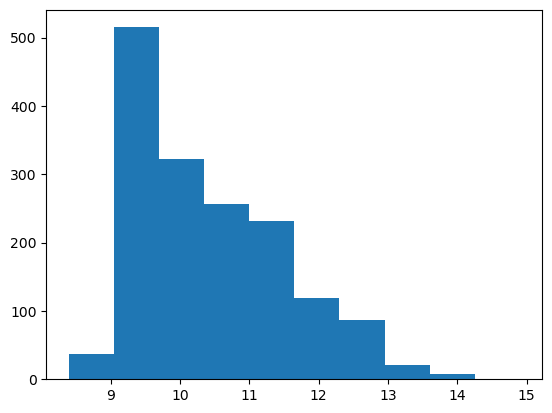

In [338]:
plt.hist(DatosArb.alcohol)

(array([  8.,  27.,  90., 250., 485., 450., 185.,  74.,  19.,  11.]),
 array([0.99007 , 0.991432, 0.992794, 0.994156, 0.995518, 0.99688 ,
        0.998242, 0.999604, 1.000966, 1.002328, 1.00369 ]),
 <BarContainer object of 10 artists>)

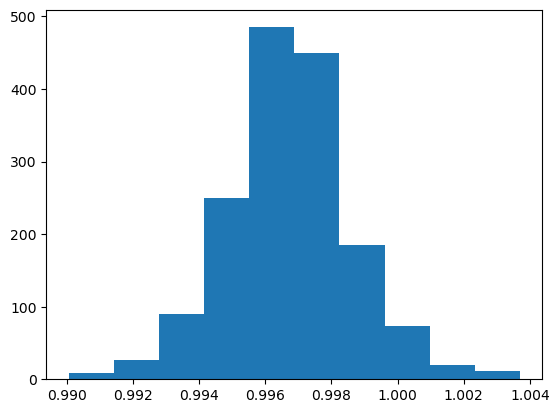

In [339]:
plt.hist(DatosArb.density)

(array([  2.,  27., 134., 361., 555., 352., 132.,  29.,   3.,   4.]),
 array([2.74 , 2.867, 2.994, 3.121, 3.248, 3.375, 3.502, 3.629, 3.756,
        3.883, 4.01 ]),
 <BarContainer object of 10 artists>)

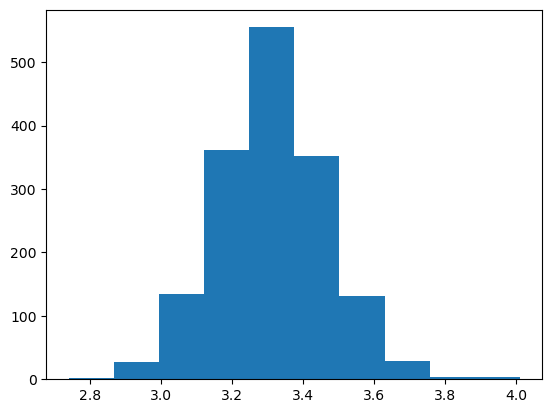

In [340]:
plt.hist(DatosArb.pH)

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

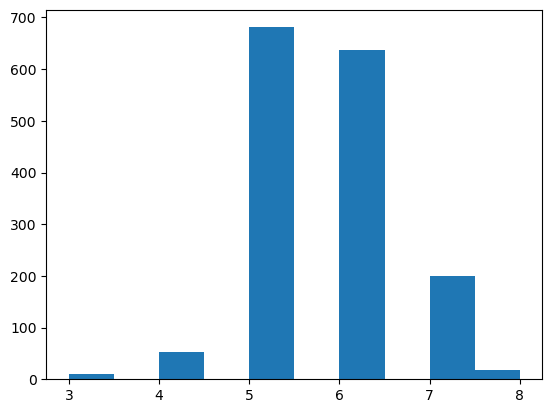

In [341]:
plt.hist(DatosArb.quality)

<Axes: xlabel='chlorides', ylabel='residual_sugar'>

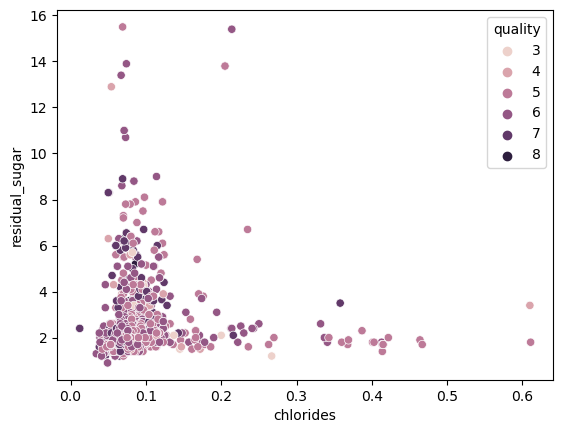

In [342]:
sns.scatterplot(x = "chlorides", y = "residual_sugar", hue = "quality", data= DatosArb)

In [343]:
predictors_col = ["density", "pH", "residual_sugar", "sulphates"]  # variables de prediccion#
target_col = ['alcohol']  #variable Objetivo#


In [344]:
predictors_col = DatosArb[predictors_col]
target = DatosArb [target_col]

In [345]:
predictors_col

,density,pH,residual_sugar,sulphates
0,0.99780,3.51,1.9,0.56
1,0.99680,3.20,2.6,0.68
2,0.99700,3.26,2.3,0.65
3,0.99800,3.16,1.9,0.58
4,0.99780,3.51,1.9,0.56
...,...,...,...,...
1594,0.99490,3.45,2.0,0.58
1595,0.99512,3.52,2.2,0.76
1596,0.99574,3.42,2.3,0.75
1597,0.99547,3.57,2.0,0.71


In [346]:
target

,alcohol
0,9.4
1,9.8
2,9.8
3,9.8
4,9.4
...,...
1594,10.5
1595,11.2
1596,11.0
1597,10.2


In [347]:
corr = predictors_col.corr()
corr

,density,pH,residual_sugar,sulphates
density,1.000000,-0.341699,0.355283,0.148506
pH,-0.341699,1.000000,-0.085652,-0.196648
residual_sugar,0.355283,-0.085652,1.000000,0.005527
sulphates,0.148506,-0.196648,0.005527,1.000000


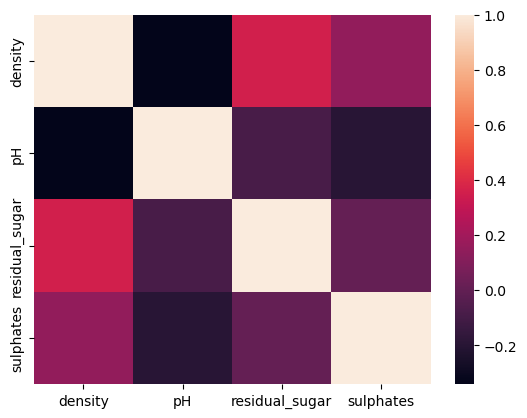

In [348]:
sns.heatmap(corr)
plt.show()
#Mapa de Calor#

In [349]:
X_train, X_test, y_train, y_test = train_test_split(predictors_col, target, test_size= 0.2, random_state=13)

In [350]:
##tree =DecisionTreeClassifier()

In [351]:
tree =DecisionTreeRegressor()

In [352]:
arbol = tree.fit (X_train, y_train)

[Text(0.33208002343657894, 0.9761904761904762, 'x[0] <= 0.995\nsquared_error = 1.161\nsamples = 1279\nvalue = 10.437'),
 Text(0.08419299693468521, 0.9285714285714286, 'x[0] <= 0.994\nsquared_error = 1.042\nsamples = 273\nvalue = 11.576'),
 Text(0.023431973591134168, 0.8809523809523809, 'x[0] <= 0.992\nsquared_error = 0.722\nsamples = 85\nvalue = 12.384'),
 Text(0.005894836123555765, 0.8333333333333334, 'x[1] <= 3.325\nsquared_error = 0.613\nsamples = 13\nvalue = 13.328'),
 Text(0.001886347559537845, 0.7857142857142857, 'x[1] <= 3.07\nsquared_error = 0.208\nsamples = 4\nvalue = 12.25'),
 Text(0.0009431737797689225, 0.7380952380952381, 'squared_error = 0.0\nsamples = 2\nvalue = 12.7'),
 Text(0.0028295213393067674, 0.7380952380952381, 'x[0] <= 0.991\nsquared_error = 0.01\nsamples = 2\nvalue = 11.8'),
 Text(0.001886347559537845, 0.6904761904761905, 'squared_error = 0.0\nsamples = 1\nvalue = 11.7'),
 Text(0.00377269511907569, 0.6904761904761905, 'squared_error = -0.0\nsamples = 1\nvalue = 1

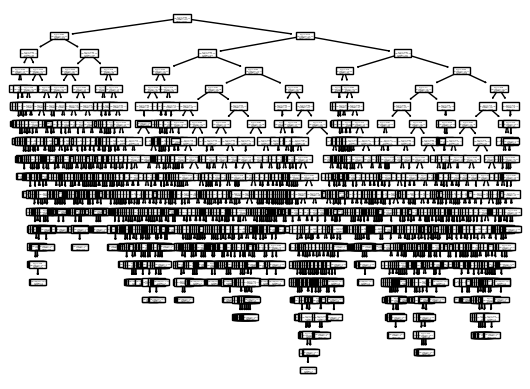

In [353]:
plot_tree(arbol)

In [354]:
Predicciones = arbol.predict(X_test)

In [355]:
Predicciones

array([ 9.3       , 10.3       , 10.        , 10.8       , 10.5       ,
        9.8       , 10.        , 13.6       ,  9.4       , 10.4       ,
        9.4       ,  9.1       , 10.2       , 11.5       ,  9.9       ,
       10.6       , 11.        , 11.6       ,  9.7       , 11.08333333,
        9.7       ,  9.3       , 12.5       ,  9.7       , 10.2       ,
       10.4       ,  9.9       ,  9.1       , 10.5       , 12.8       ,
       12.8       ,  9.6       ,  9.5       , 10.7       , 10.4       ,
        9.4       ,  9.2       ,  9.4       ,  9.8       , 10.7       ,
       11.        ,  9.4       , 10.4       ,  9.        , 10.1       ,
       10.5       ,  9.5       , 14.        ,  9.3       , 12.        ,
       10.4       ,  9.5       , 11.2       ,  9.9       , 11.        ,
        9.9       , 10.        , 12.        ,  9.6       ,  9.5       ,
       10.5       , 10.5       ,  9.4       , 10.2       , 10.5       ,
       11.2       ,  9.7       , 10.7       , 10.1       ,  9.  

In [391]:
pd.crosstab(np.array([y(0) for y in y_test.iloc[:, 0].tolist()]), predicciones, rownames=['Actual'],colnames=['Predicciones'])

TypeError: 'float' object is not callable

In [392]:
y_test.iloc[:, 0].tolist()

[12.2,
 11.0,
 10.0,
 10.8,
 10.5,
 9.8,
 10.7,
 11.6,
 9.4,
 10.0,
 9.4,
 9.1,
 10.2,
 10.4,
 9.9,
 10.0,
 11.0,
 11.4,
 9.8,
 11.3,
 9.7,
 9.3,
 12.8,
 9.7,
 10.5,
 9.3,
 9.3,
 9.2,
 10.0,
 11.4,
 11.0,
 10.4,
 9.5,
 10.7,
 9.3,
 10.1,
 9.6,
 10.1,
 9.5,
 11.1,
 9.5,
 9.8,
 10.4,
 9.0,
 10.1,
 10.0,
 9.5,
 13.6,
 9.8,
 12.0,
 9.5,
 11.9,
 11.1,
 9.9,
 11.0,
 9.9,
 9.5,
 12.0,
 10.5,
 9.5,
 9.4,
 9.5,
 9.4,
 9.5,
 11.2,
 11.2,
 10.1,
 10.2,
 10.1,
 9.0,
 10.6,
 9.4,
 11.0,
 10.2,
 9.5,
 10.2,
 9.8,
 9.6,
 9.6,
 9.5,
 12.5,
 12.9,
 10.9,
 9.8,
 10.5,
 9.5,
 12.4,
 10.7,
 10.8,
 10.3,
 10.2,
 10.1,
 13.3,
 10.5,
 11.1,
 9.6,
 9.5,
 9.1,
 9.5,
 12.9,
 9.8,
 11.3,
 10.3,
 9.8,
 11.6,
 11.3,
 10.0,
 10.8,
 11.2,
 12.5,
 10.3,
 14.0,
 9.8,
 10.1,
 9.2,
 10.2,
 10.6,
 11.9,
 11.5,
 11.1,
 9.5,
 11.0,
 9.4,
 11.6,
 10.4,
 10.1,
 9.7,
 9.8,
 10.4,
 10.0,
 9.4,
 9.1,
 10.5,
 11.5,
 9.9,
 9.5,
 11.7,
 9.2,
 10.7,
 12.0,
 9.3,
 9.5,
 9.6,
 10.9,
 12.8,
 10.4,
 9.2,
 9.1,
 9.5,
 10.2,
 9.7,
 11.6,